<a href="https://colab.research.google.com/github/HSDevCraft/PyTorch/blob/main/Simple_Neural_Network_(NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import torch
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
%matplotlib inline

In [87]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer 1 -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() # Instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [121]:
# Pick a maunal seed for randomization
torch.manual_seed(32)

# Create an instance of Model
model = Model()

In [89]:
print(model)

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)


In [90]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [91]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [92]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [93]:
df['species'].replace('setosa', 0.0, inplace = True)
df['species'].replace('versicolor', 1.0, inplace = True)
df['species'].replace('virginica', 2.0, inplace = True)

In [94]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [95]:
df[df['species']==2.0].count()

sepal_length    50
sepal_width     50
petal_length    50
petal_width     50
species         50
dtype: int64

In [96]:
# Train Test Split! Set X, y
X = df.drop('species', axis = 1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [97]:
y = df['species']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

In [98]:
# Convert X & y to numpy values
X = X.values
y = y.values

In [122]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =32)

In [123]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [124]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [125]:
# Set the criterion of the model to measure the error, how far off the predictions from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [126]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [127]:
for param in model.parameters():
  print(type(param), param.size())

<class 'torch.nn.parameter.Parameter'> torch.Size([8, 4])
<class 'torch.nn.parameter.Parameter'> torch.Size([8])
<class 'torch.nn.parameter.Parameter'> torch.Size([9, 8])
<class 'torch.nn.parameter.Parameter'> torch.Size([9])
<class 'torch.nn.parameter.Parameter'> torch.Size([3, 9])
<class 'torch.nn.parameter.Parameter'> torch.Size([3])


In [128]:
# Train our model!
# Epochs? (one run through all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
  # Go forward nd get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every at 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propogation: take the error rate of forward propogation & feeb it back to the network
  # to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.169895887374878
Epoch: 10 and loss: 0.9578844308853149
Epoch: 20 and loss: 0.7988812923431396
Epoch: 30 and loss: 0.634953498840332
Epoch: 40 and loss: 0.44043001532554626
Epoch: 50 and loss: 0.291716992855072
Epoch: 60 and loss: 0.17829042673110962
Epoch: 70 and loss: 0.11587586998939514
Epoch: 80 and loss: 0.08928147703409195
Epoch: 90 and loss: 0.07743765413761139
Epoch: 100 and loss: 0.07124082744121552
Epoch: 110 and loss: 0.06744465976953506
Epoch: 120 and loss: 0.06482169777154922
Epoch: 130 and loss: 0.06285709887742996
Epoch: 140 and loss: 0.06129826232790947
Epoch: 150 and loss: 0.06000852212309837
Epoch: 160 and loss: 0.058905504643917084
Epoch: 170 and loss: 0.057936906814575195
Epoch: 180 and loss: 0.057068951427936554
Epoch: 190 and loss: 0.056279949843883514


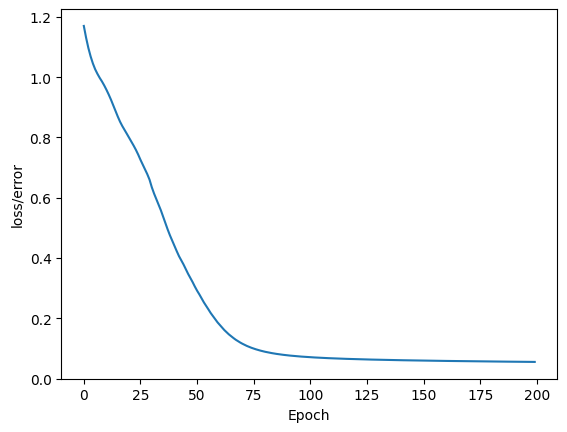

In [129]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")
plt.show()

In [130]:
# Evaluate the Model on Test dataset (validate model on test set)
with torch.no_grad():
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss/error

In [131]:
loss

tensor(0.0298)

In [132]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us about the type of flower class our network thinks it is
    print(f"{i + 1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    if y_val.argmax().item() == y_test[i]:
      correct += 1

    print(f'We got {correct} correct!')

1.) tensor([-4.5474,  5.6474,  0.6258]) 	 1 	 1
We got 1 correct!
2.) tensor([  9.7839,   2.0130, -14.4508]) 	 0 	 0
We got 2 correct!
3.) tensor([  8.7851,   2.2439, -13.3628]) 	 0 	 0
We got 3 correct!
4.) tensor([-4.7777,  5.9443,  0.5937]) 	 1 	 1
We got 4 correct!
5.) tensor([-9.7693,  3.8727,  7.0655]) 	 2 	 2
We got 5 correct!
6.) tensor([-10.4429,   5.0144,   6.8463]) 	 2 	 2
We got 6 correct!
7.) tensor([  8.1658,   2.5038, -12.7315]) 	 0 	 0
We got 7 correct!
8.) tensor([  9.2193,   2.0836, -13.7833]) 	 0 	 0
We got 8 correct!
9.) tensor([-4.0243,  5.9801, -0.2057]) 	 1 	 1
We got 9 correct!
10.) tensor([  9.5090,   2.0918, -14.1647]) 	 0 	 0
We got 10 correct!
11.) tensor([-4.9568,  6.4096,  0.5537]) 	 1 	 1
We got 11 correct!
12.) tensor([-11.6292,   2.6205,   9.6212]) 	 2 	 2
We got 12 correct!
13.) tensor([-2.2209,  5.4773, -1.5542]) 	 1 	 1
We got 13 correct!
14.) tensor([-1.4594,  6.1748, -2.9049]) 	 1 	 1
We got 14 correct!
15.) tensor([-9.9357,  3.6303,  7.3054]) 	 2 

#### **Evaluate new data on the network**

In [133]:
new_iris = torch.tensor([4.9, 3.8, 1.6, 0.7])

In [135]:
with torch.no_grad():
  print(model(new_iris))

tensor([  8.4926,   2.2347, -12.9768])


In [136]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [137]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-9.0975,  3.6127,  6.4771])


#### **Save & load or NN model**

In [138]:
torch.save(model.state_dict(), 'iris_model.pt')

In [139]:
# Load the saved model
saved_model = Model()
saved_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [140]:
# Make sure if the model loaded successfully
saved_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)